# Project 1 Final - Understanding Products & Outlets

This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.
  
To finalize this project, your task is to improve your model to predict sales and prepare a short (5-10 minute) presentation about your project.
  
 * Can you use other methods (ex. random forests) to improve your model to predict sales?
 * Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
 * Prepare a short (5-10 minute) presentation. Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.
 * Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.
  
Commit all of your work to GitHub and turn in a link to your GitHub repo with your final project. Make sure you include your presentation slides and recording on your GitHub repo as well.

### Current State of Modeling  
Currently, a K-Nearest Neighbors Regression model has been used to predict Item Outlet Sales for the dataset.  After running the model with various values of K, The best model performance was with K value of 45. The Mean Absolute Error is $790.  
  
The features of the data that provide the best model output are as follows:
 * Item MRP
 * Item Fat Content
 * Outlet Size
 * Outlet Location Type
 * Outlet Type
  

### Model Improvements
For this section, I will try a bagged trees regression and a random forest regression model to better predict Item Outlet Sales.

### Import Statements

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# bagged trees and random forest classifiers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

# import for machine learning metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

### Load Data

In [2]:
# get file
filename = r"D:\CodingDojo\food-sales-predictions-kb\sales_dummies.csv"

# create dataframe
sales_dummies = pd.read_csv(filename)
sales_dummies.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods,Outlet_Size_Label,Outlet_Location_Label,Outlet_Type_Label
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,2,1,3
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,1,0,2,2,1
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,1,0,0,0,0,0,2,1,3
3,NCD19,8.930,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,...,1,0,0,0,0,0,0,0,2,3
4,FDP36,10.395,0.000000,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,...,0,0,0,0,0,0,0,2,2,1


In [3]:
# view dataframe information
sales_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_Identifier             6109 non-null   object 
 1   Item_Weight                 6109 non-null   float64
 2   Item_Visibility             6109 non-null   float64
 3   Item_MRP                    6109 non-null   float64
 4   Outlet_Identifier           6109 non-null   object 
 5   Outlet_Establishment_Year   6109 non-null   int64  
 6   Outlet_Size                 6109 non-null   object 
 7   Outlet_Location_Type        6109 non-null   object 
 8   Outlet_Type                 6109 non-null   object 
 9   Item_Outlet_Sales           6109 non-null   float64
 10  Fat_Regular                 6109 non-null   int64  
 11  Type_Breads                 6109 non-null   int64  
 12  Type_Breakfast              6109 non-null   int64  
 13  Type_Canned                 6109 

### Feature Matrix and Target Vector

In [4]:
# feature matrix
X = sales_dummies.iloc[:,[1,2,3,10] + list(range(11,29))]

# target vector
y = sales_dummies.loc[:,'Item_Outlet_Sales'].values

# check array shapes
X.shape, y.shape

((6109, 22), (6109,))

In [5]:
# split feature matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Bagged Trees Model

In [6]:
# run BaggingRegressor with range of n_estimators from 10 to 300
# make dataframe of results
# code inspired from 
# https://datasciencewithsan.com/knn/

# list to catch model results
bag_results = []

# for loop
for n_est in ([1,10] + list(range(20,301,10))):
    
    # instantiate regressor model
    bag_reg = BaggingRegressor(n_estimators= n_est,
                            random_state=0,
                            oob_score=True)
    
    # fit training data
    bag_reg.fit(X_train, y_train)
    
    # capture test scores
    test_score = bag_reg.score(X_test, y_test)
    
    # capture training scores
    train_score = bag_reg.score(X_train, y_train)
    
    # predicted sales
    y_pred = bag_reg.predict(X_test)
    
    # Mean of Absolute Error
    MAE = mae(y_test, y_pred)
    
    # Mean of Square of Errors
    MSE = mse(y_test, y_pred)
    
    # Root of Mean of Square Errors
    RMSE = MSE**0.5
    
    # capture results into list of tuples
    bag_results.append((n_est, train_score, test_score, MAE, MSE, RMSE))

# create dataframe of results
df_bag = pd.DataFrame(bag_results, 
                            columns=['Number Estimators','Train Score',
                                     'Test Score','MAE','MSE','RMSE'])

# sort dataframe by MAE
df_bag.sort_values(by='MAE', inplace=True)

D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_bagging.py:1066: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_bagging.py:1066: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [7]:
df_bag

,Number Estimators,Train Score,Test Score,MAE,MSE,RMSE
26,260,0.933923,0.595097,801.600763,1.275821e+06,1129.522351
25,250,0.933962,0.594895,801.630133,1.276458e+06,1129.804474
24,240,0.933989,0.594812,801.857692,1.276720e+06,1129.920168
27,270,0.933899,0.594453,802.082609,1.277852e+06,1130.421151
19,190,0.933641,0.594977,802.234108,1.276200e+06,1129.690357
23,230,0.933874,0.594510,802.389628,1.277671e+06,1130.340893
20,200,0.933785,0.594757,802.398241,1.276893e+06,1129.996798
21,210,0.933800,0.594302,802.617305,1.278326e+06,1130.630687
18,180,0.933472,0.594795,802.716558,1.276775e+06,1129.944638
28,280,0.933987,0.593838,802.736140,1.279789e+06,1131.277587


### Feature Importance

In [8]:
# find feature importance
# this code is taken from stack overflow
# https://stackoverflow.com/questions/44333573/feature-importances-bagging-scikit-learn/44334701#44334701
# provided by Mikhail Korobov

feature_importances = np.mean([
    tree.feature_importances_ for tree in bag_reg.estimators_
], axis=0)

# find feature importance magnitude
# this code is taken from stack overflow
# https://stackoverflow.com/questions/54519113/feature-importance-in-logistic-regression-with-bagging-classifier
# provided by gorjan

coeff_magnitude = np.std(X_train, 0) * feature_importances

In [9]:
# view feature importance magnitudes
coeff_magnitude.sort_values(ascending=False)

Item_MRP                      28.532564
Item_Weight                    0.398887
Outlet_Type_Label              0.247016
Outlet_Location_Label          0.009605
Outlet_Size_Label              0.009522
Item_Visibility                0.005269
Fat_Regular                    0.004386
Type_Snack Foods               0.003474
Type_Fruits and Vegetables     0.002926
Type_Household                 0.002166
Type_Dairy                     0.001751
Type_Frozen Foods              0.001735
Type_Health and Hygiene        0.001282
Type_Canned                    0.001254
Type_Soft Drinks               0.001115
Type_Meat                      0.000975
Type_Breads                    0.000649
Type_Hard Drinks               0.000524
Type_Starchy Foods             0.000327
Type_Others                    0.000255
Type_Breakfast                 0.000196
Type_Seafood                   0.000107
dtype: float64

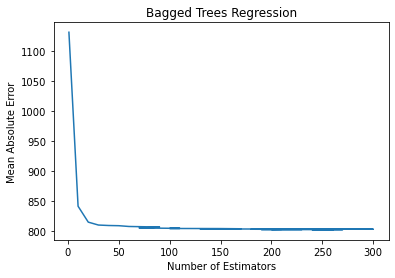

In [17]:
# plot mae vs n_estimators
plt.plot(df_bag['Number Estimators'], df_bag['MAE'])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('Bagged Trees Regression');

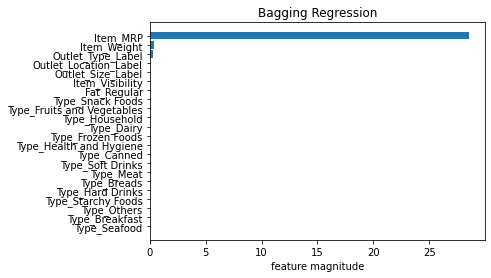

In [10]:
# visualize the feature importance magnitudes
# this code was inspired from
# https://mljar.com/blog/feature-importance-in-random-forest/
# provided by Piotr Płoński

sort_index = coeff_magnitude.argsort()
plt.barh(X_train.columns[sort_index], coeff_magnitude[sort_index]);
plt.title('Bagging Regression')
plt.xlabel('feature magnitude');

### Random Forests Model

In [11]:
# run RandomForestsRegressor with range of n_estimators from 10 to 300
# make dataframe of results

# list to catch model results
rf_results = []

# for loop
for n_est in ([1,10] + list(range(20,301,10))):
    
    # instantiate regressor model
    rf_reg = RandomForestRegressor(n_estimators= n_est,
                            random_state=0,
                            oob_score=True)
    
    # fit training data
    rf_reg.fit(X_train, y_train)
    
    # capture test scores
    test_score = rf_reg.score(X_test, y_test)
    
    # capture training scores
    train_score = rf_reg.score(X_train, y_train)
    
    # predicted sales
    y_pred = rf_reg.predict(X_test)
    
    # Mean of Absolute Error
    MAE = mae(y_test, y_pred)
    
    # Mean of Square of Errors
    MSE = mse(y_test, y_pred)
    
    # Root of Mean of Square Errors
    RMSE = MSE**0.5
    
    # capture results into list of tuples
    rf_results.append((n_est, train_score, test_score, MAE, MSE, RMSE))

# create dataframe of results
df_rf = pd.DataFrame(rf_results, 
                            columns=['Number Estimators','Train Score',
                                     'Test Score','MAE','MSE','RMSE'])

# sort dataframe by MAE
df_rf.sort_values(by='MAE', inplace=True)

D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [12]:
df_rf

,Number Estimators,Train Score,Test Score,MAE,MSE,RMSE
20,200,0.933779,0.594384,802.135332,1.278070e+06,1130.517492
26,260,0.933936,0.594189,802.195463,1.278684e+06,1130.788954
19,190,0.933645,0.594498,802.196460,1.277710e+06,1130.358517
25,250,0.933965,0.594154,802.293067,1.278794e+06,1130.837538
24,240,0.934003,0.593938,802.423842,1.279475e+06,1131.138891
18,180,0.933467,0.594617,802.449605,1.277335e+06,1130.192327
27,270,0.933895,0.593647,802.545103,1.280392e+06,1131.543883
21,210,0.933788,0.593944,802.668227,1.279454e+06,1131.129590
23,230,0.933864,0.593771,802.739456,1.280001e+06,1131.371298
28,280,0.934013,0.593314,803.158041,1.281439e+06,1132.006695


### Feature Importance

In [13]:
# feature importances
rf_feature_importances = rf_reg.feature_importances_

# find feature importance magnitude
rf_magnitude = np.std(X_train, 0) * rf_feature_importances

In [14]:
# view feature importance magnitudes
rf_magnitude.sort_values(ascending=False)

Item_MRP                      28.528551
Item_Weight                    0.398552
Outlet_Type_Label              0.246967
Outlet_Location_Label          0.009632
Outlet_Size_Label              0.009569
Item_Visibility                0.005268
Fat_Regular                    0.004444
Type_Snack Foods               0.003471
Type_Fruits and Vegetables     0.002929
Type_Household                 0.002167
Type_Frozen Foods              0.001743
Type_Dairy                     0.001731
Type_Health and Hygiene        0.001291
Type_Canned                    0.001256
Type_Soft Drinks               0.001119
Type_Meat                      0.000973
Type_Breads                    0.000648
Type_Hard Drinks               0.000522
Type_Starchy Foods             0.000328
Type_Others                    0.000254
Type_Breakfast                 0.000194
Type_Seafood                   0.000109
dtype: float64

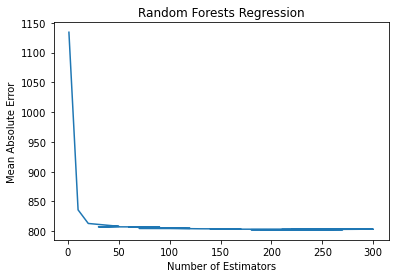

In [20]:
# plot mae vs n_estimators
plt.plot(df_rf['Number Estimators'], df_rf['MAE'])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forests Regression');

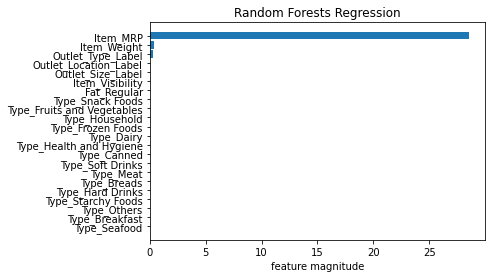

In [15]:
# visualize the feature importance magnitudes

sort_index = rf_magnitude.argsort()
plt.barh(X_train.columns[sort_index], rf_magnitude[sort_index]);
plt.title('Random Forests Regression')
plt.xlabel('feature magnitude');